Imports


In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from matplotlib.figure import Figure
from matplotlib.axes import Axes
from pandas import DataFrame
from imblearn.over_sampling import ADASYN
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier


Boilerplate

In [41]:
import warnings
warnings.filterwarnings("ignore")
RANDOM_STATE = 1628


In [42]:
df_red = pd.read_csv('data/winequality-red.csv', sep=';')
df_red['type'] = 'red'

df_white = pd.read_csv('data/winequality-white.csv', sep=';')
df_white['type'] = 'white'

df=pd.concat([df_red, df_white], ignore_index=True)

In [43]:
df


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,red
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,white
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,white
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,white
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,white


In [44]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


# Exploratory Data Analysis


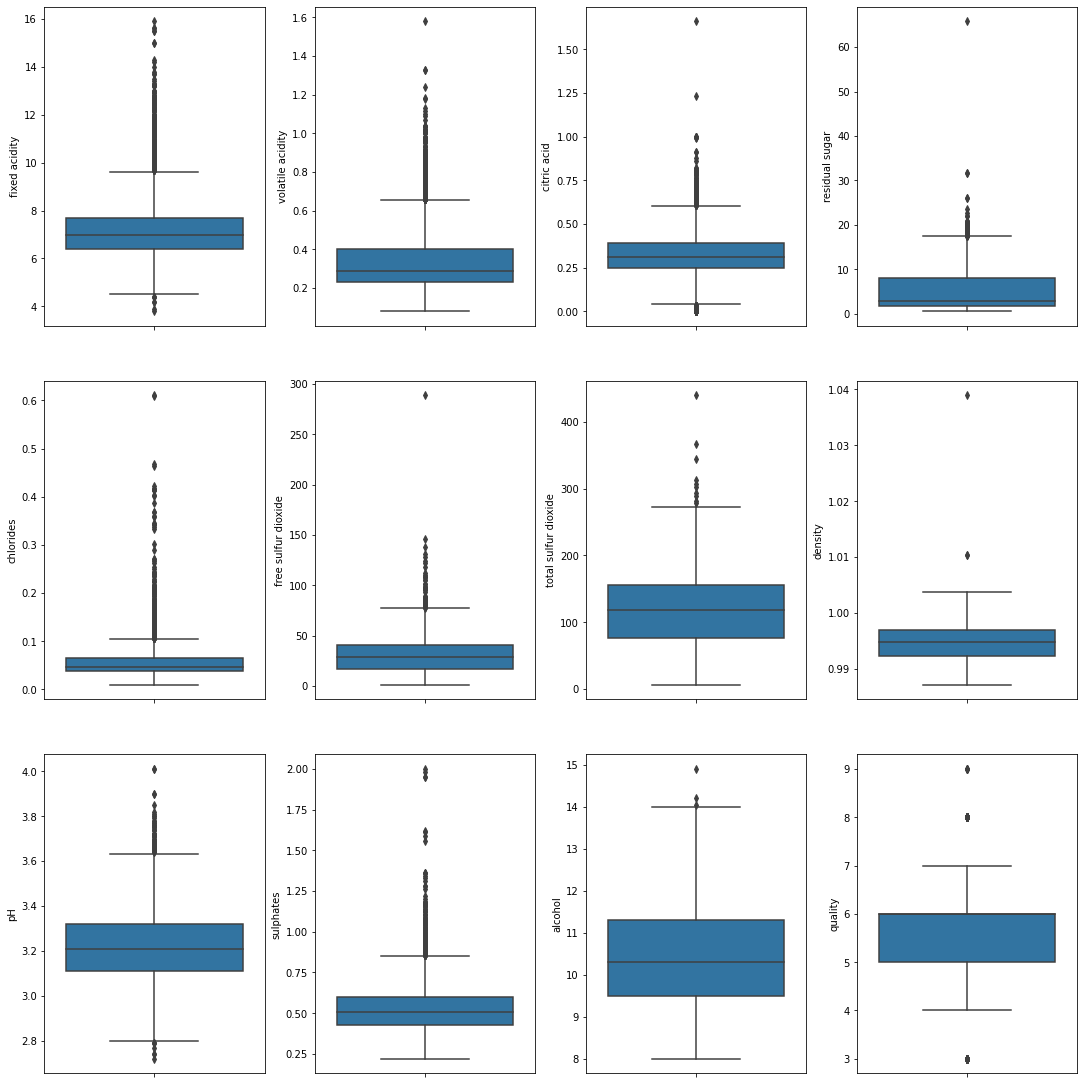

In [45]:
def create_box_plots(df:DataFrame, columns:list[str]|None = None):
    fig, ax = plt.subplots(ncols=4, nrows=3, figsize=(15,15))
    index = 0
    ax = ax.flatten()

    if columns is None:
        columns = df.columns.tolist()

    for column in columns:
        if column != 'type':
            sns.boxplot(y=column, data=df, ax=ax[index])
            index += 1
    plt.tight_layout(pad=0.5, w_pad=0.7, h_pad=5.0)

create_box_plots(df)

<AxesSubplot:>

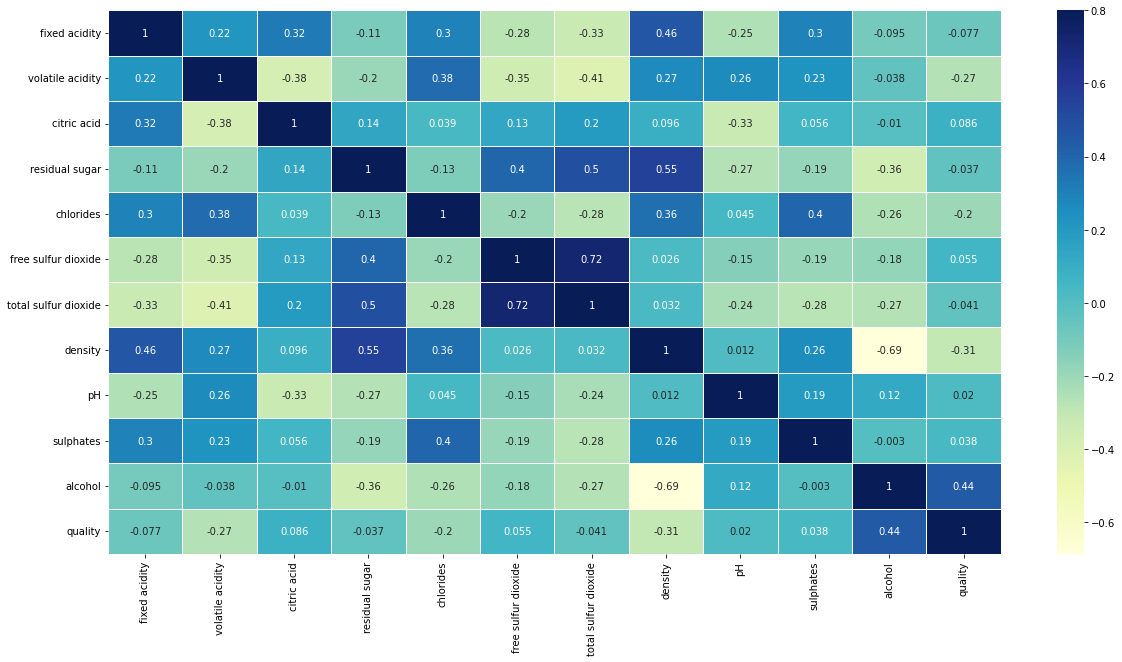

In [46]:
corr = df.corr()
plt.figure(figsize=(20,10))
sns.heatmap(corr, annot=True, cmap='YlGnBu', vmax=.8, linewidths=0.5)

from the above correlation matrix, we can see that the correlation between the variables is quite high.


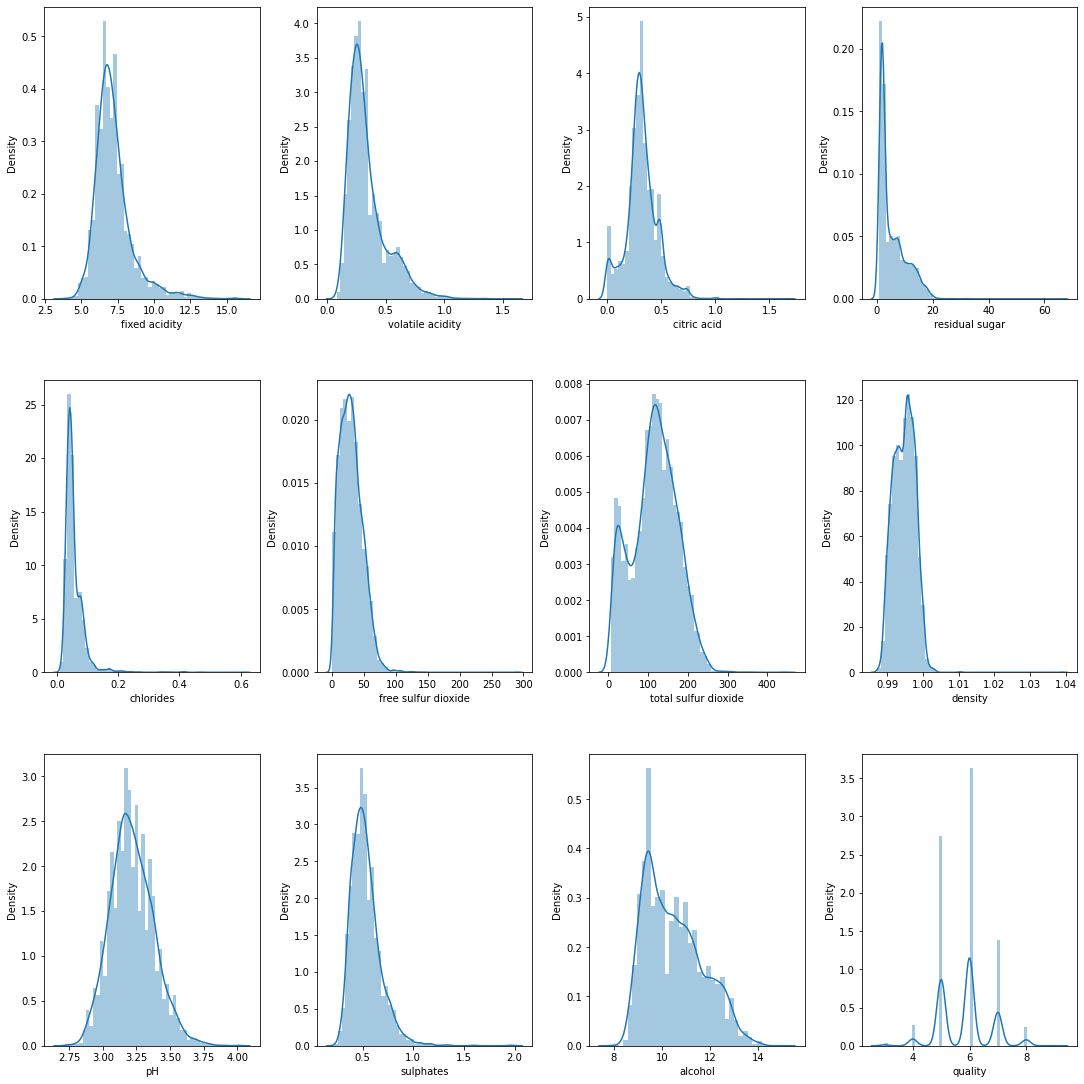

In [47]:
def create_dist_plots(df:DataFrame, columns:list[str]|None = None):
    fig, ax = plt.subplots(ncols=4, nrows=3, figsize=(15,15))
    index = 0
    ax = ax.flatten()

    if columns is None:
        columns = df.columns.tolist()
        
    for column, value in df.items():
     if column != 'type' and column in columns:
        sns.distplot(value, ax=ax[index])
        index += 1
        plt.tight_layout(pad=0.5, w_pad=0.7, h_pad=5.0)


create_dist_plots(df)

<AxesSubplot:xlabel='type', ylabel='count'>

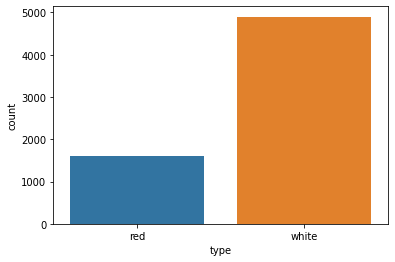

In [48]:
sns.countplot(x='type', data=df)


<AxesSubplot:xlabel='quality', ylabel='count'>

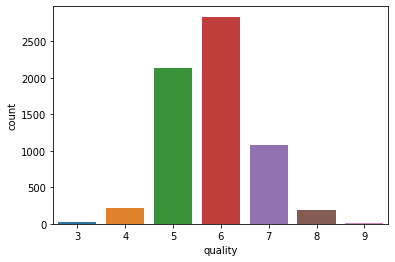

In [49]:
sns.countplot(x='quality', data=df) 

In [50]:
x:int = 4

# Input data preprocessing 

In [51]:
X = df.drop(columns=['quality'])
y = df['quality']

## One hot Encoding

In [52]:
categorical_columns = ['type']

for column in categorical_columns:
    dummies = pd.get_dummies(X[column], prefix=column)
    X = pd.concat([X, dummies], axis=1)
    X = X.drop(column, axis=1)

In [53]:
X

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type_red,type_white
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,1,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,1,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,1,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,1,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,0,1
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,0,1
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,0,1
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,0,1


## Balancing the data


In [54]:
# preprocess data
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
type                    0
dtype: int64

In [55]:
df['quality'].value_counts().sort_index()

3      30
4     216
5    2138
6    2836
7    1079
8     193
9       5
Name: quality, dtype: int64

as there are no null values in the data, we do not need to preprocess it.
Since the data is imbalanced, we need to balance it.


In [56]:
# balance the df using ADASYN
X_resampled, y_resampled = ADASYN(n_neighbors = 4).fit_resample(X, y)



In [57]:
y.value_counts().sort_index()

3      30
4     216
5    2138
6    2836
7    1079
8     193
9       5
Name: quality, dtype: int64

In [58]:
y_resampled.value_counts().sort_index()

3    2844
4    2772
5    2437
6    2836
7    2871
8    2800
9    2835
Name: quality, dtype: int64

# Training the model

In [59]:
from dataclasses import dataclass


@dataclass
class Result:
    model_name:str
    accuracy:float
    # rmse:float
    CV_score:float
    # confusion_matrix:list[list[int]]


In [60]:
models_list = [LogisticRegression(), DecisionTreeClassifier(), RandomForestClassifier(), ExtraTreesClassifier()]
results : list[Result] = []

In [61]:
def classify(model, X, y):
    x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=RANDOM_STATE)
    # train the model
    model.fit(x_train, y_train)
    
    # cross-validation
    results.append(Result(
        model_name=model.__class__.__name__, 
        accuracy=model.score(x_test, y_test) * 100, 
        CV_score=np.mean(cross_val_score(model, X, y, cv=5))*100))

In [ ]:
for model in models_list:
    classify(model, X_resampled, y_resampled)


In [66]:
for result in results:
    print('''{model_name}
    ========== 
    Accuracy: {accuracy:.2f}% 
    CV Score: {CV_score:.2f}%\n'''.format(**result.__dict__))

LogisticRegression
    Accuracy: 32.75% 
    CV Score: 29.89%

DecisionTreeClassifier
    Accuracy: 80.26% 
    CV Score: 67.69%

RandomForestClassifier
    Accuracy: 88.37% 
    CV Score: 76.21%

ExtraTreesClassifier
    Accuracy: 89.23% 
    CV Score: 77.21%

